In [24]:
import matplotlib.pyplot as plt

import matplotlib
from math import sqrt
SPINE_COLOR = 'gray'

tick_y_size = 8
tick_x_size = 8
title_size = 12

def latexify(fig_width=None, fig_height=None, columns=1, font_size=8, tick_size=8):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.7 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean + 1.2 # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES
    #print(matplotlib.rcParams.keys())
    params = {'backend': 'ps',
              #'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': font_size, # fontsize for x and y labels (was 10)
              'axes.titlesize': title_size,
              'font.size': font_size, # was 10
              'legend.fontsize': font_size, # was 10
              'xtick.labelsize': tick_size,
              'ytick.labelsize': tick_size,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax, hide = ['top', 'right'], show= ['left', 'bottom']):

    for spine in hide:
        ax.spines[spine].set_visible(False)

    for spine in show:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax


Above code is for latex setup, fonts, etc

In [39]:
import numpy as np
import random
from matplotlib.ticker import EngFormatter

from matplotlib import cm

viridis = cm.get_cmap('Paired', 2)
viridis = viridis(range(2))


Select colormap and set viridis variable, for example: 'summer', 'Paired', etc (https://matplotlib.org/examples/color/colormaps_reference.html)[https://matplotlib.org/examples/color/colormaps_reference.html]

In [50]:

'''
 

Evolutionary algorithm  &  1567  &  1567 \\
Knuth's algorithm S  &  1657  &  1657 \\
N-queens problem  &  1112  &  1112 \\
Nautical bell  &  674  &  674 \\
Pascal matrix generation  &  5006  &  5006 \\
Perfect shuffle  &  1470  &  1470 \\
Pythagorean triples  &  693  &  693 \\
Resistor mesh  &  2265  &  2265 \\
Run-length encoding  &  1762  &  1762 \\
Sattolo cycle  &  1903  &  1903 \\
Sexy primes  &  3608  &  3608 \\
Shortest common supersequence  &  1277  &  1277 \\
Smith numbers  &  1324  &  1324 \\
Validate international securities identification number  &  1333  &  1333 \\
Weird numbers  &  1503  &  1503 \\
Zebra puzzle  &  3135  &  3146 \\
'''

data = {
    "Banker's algorithm": [
        ["LLVM", 3045],
        ["Souper pass", 3045]
    ],
    "Addition chains": [
        ["LLVM", 5266],
        ["Souper pass", 5266]
    ],
    "Aliquot sequence classifications 1": [

        ["LLVM", 2053],
        ["Souper pass", 2053]
    ],
    "Aliquot sequence classifications 2": [

        ["LLVM", 2568],
        ["Souper pass", 2568]
    ],
    "Babbage problem": [
        ["LLVM", 431],
        ["Souper pass", 411]
    ],
    "Flipping bits game": [
        ["LLVM", 3519],
        ["Souper pass", 3451]
    ],
    "Bitwise IO ": [
        ["LLVM", 2229],
        ["Souper pass", 2286]
    ],
    "Eban numbers": [
        ['LLVM', 1198],
        ["Souper pass", 1198]
    ],
    "Paraffins": [
        ['LLVM', 1819],
        ['Souper pass', 1805]
    ]
}


Above data is preliminary one

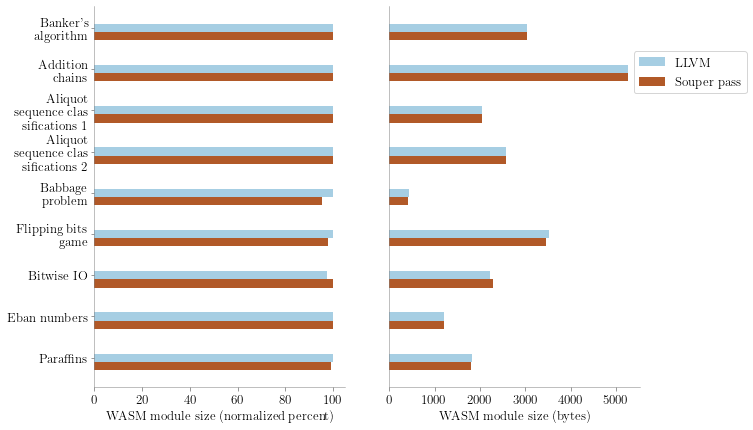

In [51]:

width = 0.2
padding = 0.1
from textwrap import wrap

def highPlot(figName):

    latexify(fig_width=12, fig_height=6, font_size=13, tick_size=13)

    fig5, axs = plt.subplots(ncols=2, sharey=False)

    ax, ax2 = axs
    
    format_axes(ax, hide=['top', 'right'], show=['left','bottom'])
    format_axes(ax2, hide=['top', 'right'], show=['bottom', 'left'])


    names = data.keys()
    y_pos = np.arange(len(names))

    labels = []

    marginLeft=0.1
    marginRight=0.2
    plt.tight_layout(rect=(0 + marginLeft,0,1 - marginRight,1), w_pad=1.0)
    
    oo = 0.02
    for i, name in enumerate(names):
        mx = max(map(lambda x: x[1], data[name]))
        for j, study in  enumerate(data[name]):
            size = max(oo,study[1])
            ax.barh(y_pos[i] + j*width, size/mx*100, width, align='center', color=viridis[j], label=study[0]) # normalized
            ax2.barh(y_pos[i] + j*width, size, width, align='center', color=viridis[j], label=study[0]) # real size
            if study[0] not in labels:
                labels.append(study[0])

    ax.set_yticks(y_pos)    
    ax2.set_yticks([])

    # wrap y ticks
    names = [ '\n'.join(wrap(l, 13)) for l in names ]
    ax.set_yticklabels(names)
    ax2.set_yticklabels(names)
    
    ax.invert_yaxis()  # labels read top-to-bottom
    ax2.invert_yaxis()

    ax2.legend(labels, bbox_to_anchor=(0.95,0.9))    
    

    ax.set_xlabel('WASM module size (normalized percent)')
    ax2.set_xlabel('WASM module size (bytes)')

    ax.set_title('')

    

    plt.show()


highPlot("results")